In [10]:
from EOF_manage import *
from I_O_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [11]:
dataset, dataset_names = input_interface('I_O.json')

In [13]:
eof_database, pc_database, exp_database, solver_list = eof_base_interface(dataset, 'EOF.json')

NameError: name 'eof_base_interface' is not defined

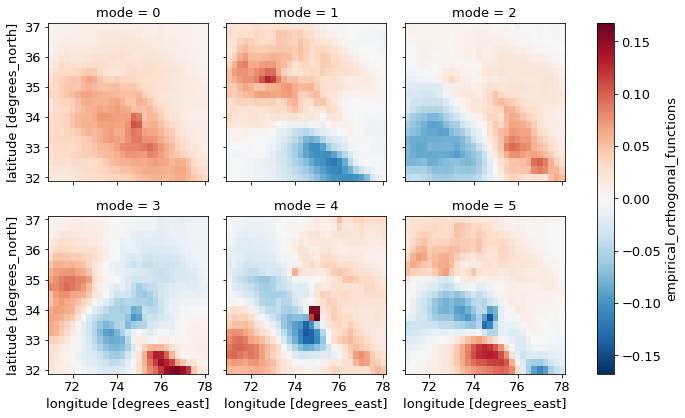

In [8]:
eof_database.eof_ERA5_tp.plot(col="mode", col_wrap = 3)

In [9]:
dataset.groupby('time.dayofyear').mean()

<xarray.Dataset>
Dimensions:    (lon: 29, lat: 21, dayofyear: 366)
Coordinates:
  * lon        (lon) float64 71.0 71.25 71.5 71.75 ... 77.25 77.5 77.75 78.0
  * lat        (lat) float64 37.0 36.75 36.5 36.25 ... 32.75 32.5 32.25 32.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    ERA5_tp    (dayofyear, lat, lon) float32 1.158 1.254 1.371 ... 6.625 5.864